In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Análise dos Municípios

In [ ]:
mun_file = pd.ExcelFile('Data\indicadoressegurancapublicamunic.xlsx')
sheet_names = mun_file.sheet_names

df_list = []

for state in sheet_names:

    temp_df = pd.read_excel('Data\indicadoressegurancapublicamunic.xlsx',sheet_name=state)
    df_list.append(temp_df)

mun_df = pd.concat(df_list)

,Cód_IBGE,Município,Sigla UF,Região,Mês/Ano,Vítimas
0,1200138,Bujari,AC,NORTE,2018-01-01,1
1,1200203,Cruzeiro Do Sul,AC,NORTE,2018-01-01,8
2,1200302,Feijó,AC,NORTE,2018-01-01,3
3,1200328,Jordão,AC,NORTE,2018-01-01,1
4,1200336,Mâncio Lima,AC,NORTE,2018-01-01,1
...,...,...,...,...,...,...
1258,1716653,Pequizeiro,TO,NORTE,2022-12-01,1
1259,1717206,Piraquê,TO,NORTE,2022-12-01,1
1260,1718303,Praia Norte,TO,NORTE,2022-12-01,2
1261,1718402,Presidente Kennedy,TO,NORTE,2022-12-01,2


In [ ]:
import datetime as dt

mun_df_clean = mun_df.copy()

mun_df_clean['Ano'] = mun_df_clean['Mês/Ano'].dt.year
mun_df_clean['Mês'] = mun_df_clean['Mês/Ano'].dt.month
mun_df_clean = mun_df_clean[['Município', 'Sigla UF', 'Região', 'Vítimas', 'Ano', 'Mês']]
mun_df_clean

,Município,Sigla UF,Região,Vítimas,Ano,Mês
0,Bujari,AC,NORTE,1,2018,1
1,Cruzeiro Do Sul,AC,NORTE,8,2018,1
2,Feijó,AC,NORTE,3,2018,1
3,Jordão,AC,NORTE,1,2018,1
4,Mâncio Lima,AC,NORTE,1,2018,1
...,...,...,...,...,...,...
1258,Pequizeiro,TO,NORTE,1,2022,12
1259,Piraquê,TO,NORTE,1,2022,12
1260,Praia Norte,TO,NORTE,2,2022,12
1261,Presidente Kennedy,TO,NORTE,2,2022,12


# Vítimas por Estado

In [ ]:
state_df = mun_df_clean.groupby(['Sigla UF','Ano','Mês']).sum(numeric_only=True).reset_index()

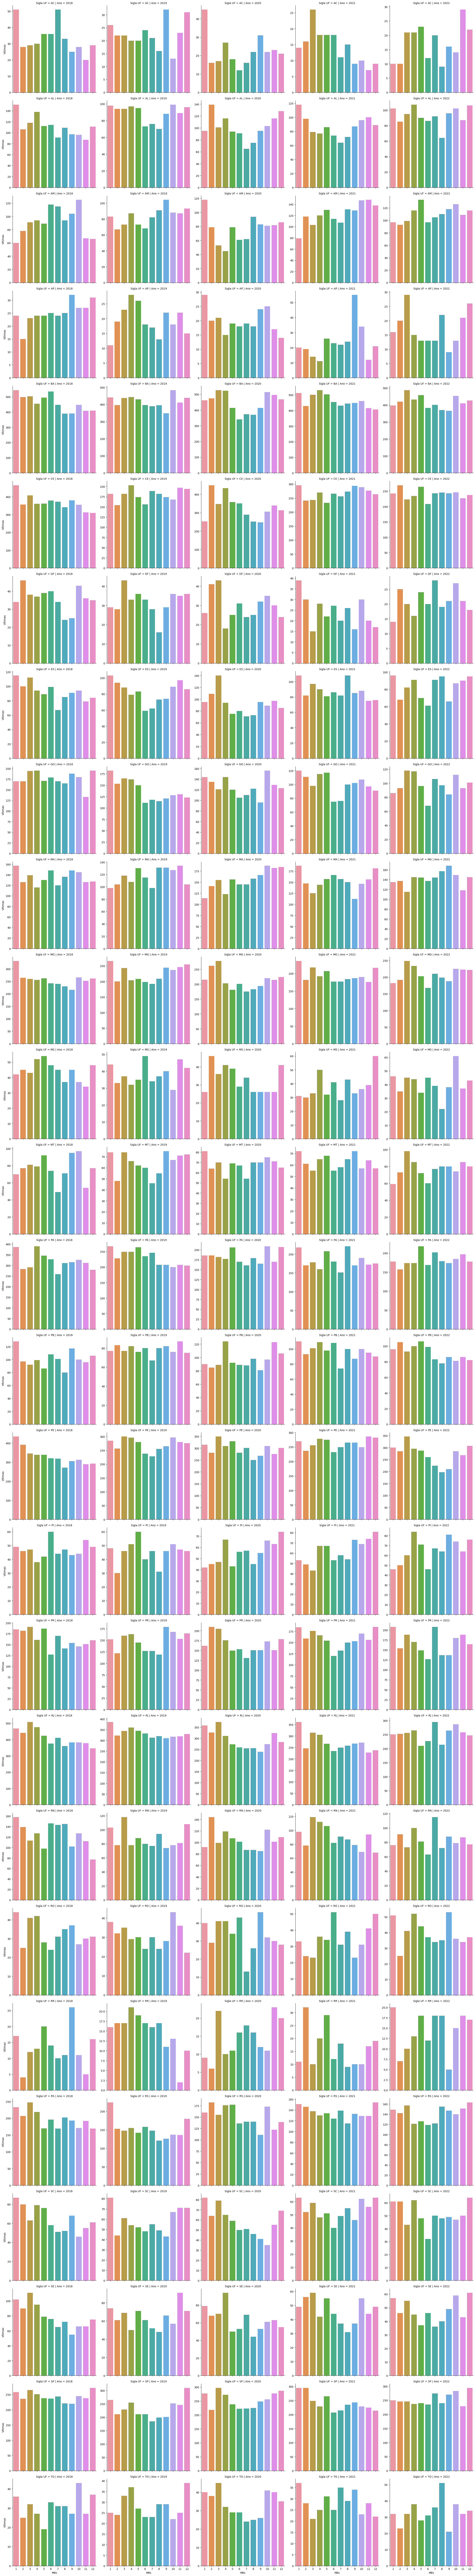

In [24]:
sns.catplot(
    data=state_df,
    x='Mês',
    y='Vítimas',
    row='Sigla UF',
    col='Ano',
    kind='bar',
    sharey= False
)

<Axes: xlabel='Mês', ylabel='Ano'>

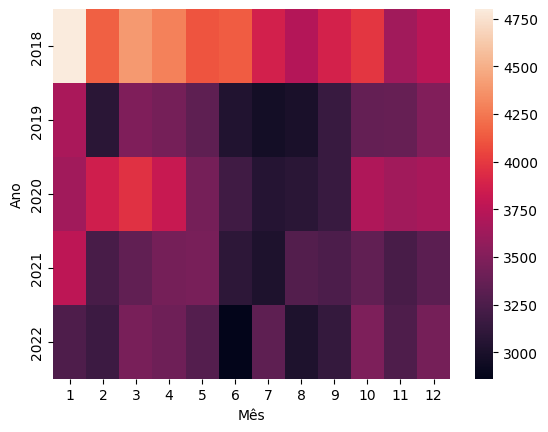

In [30]:
state3d_df = state_df.groupby(['Ano','Mês']).sum(numeric_only=True)
state3d_df = state3d_df.pivot_table(values='Vítimas',columns='Mês',index='Ano')
sns.heatmap(state3d_df)

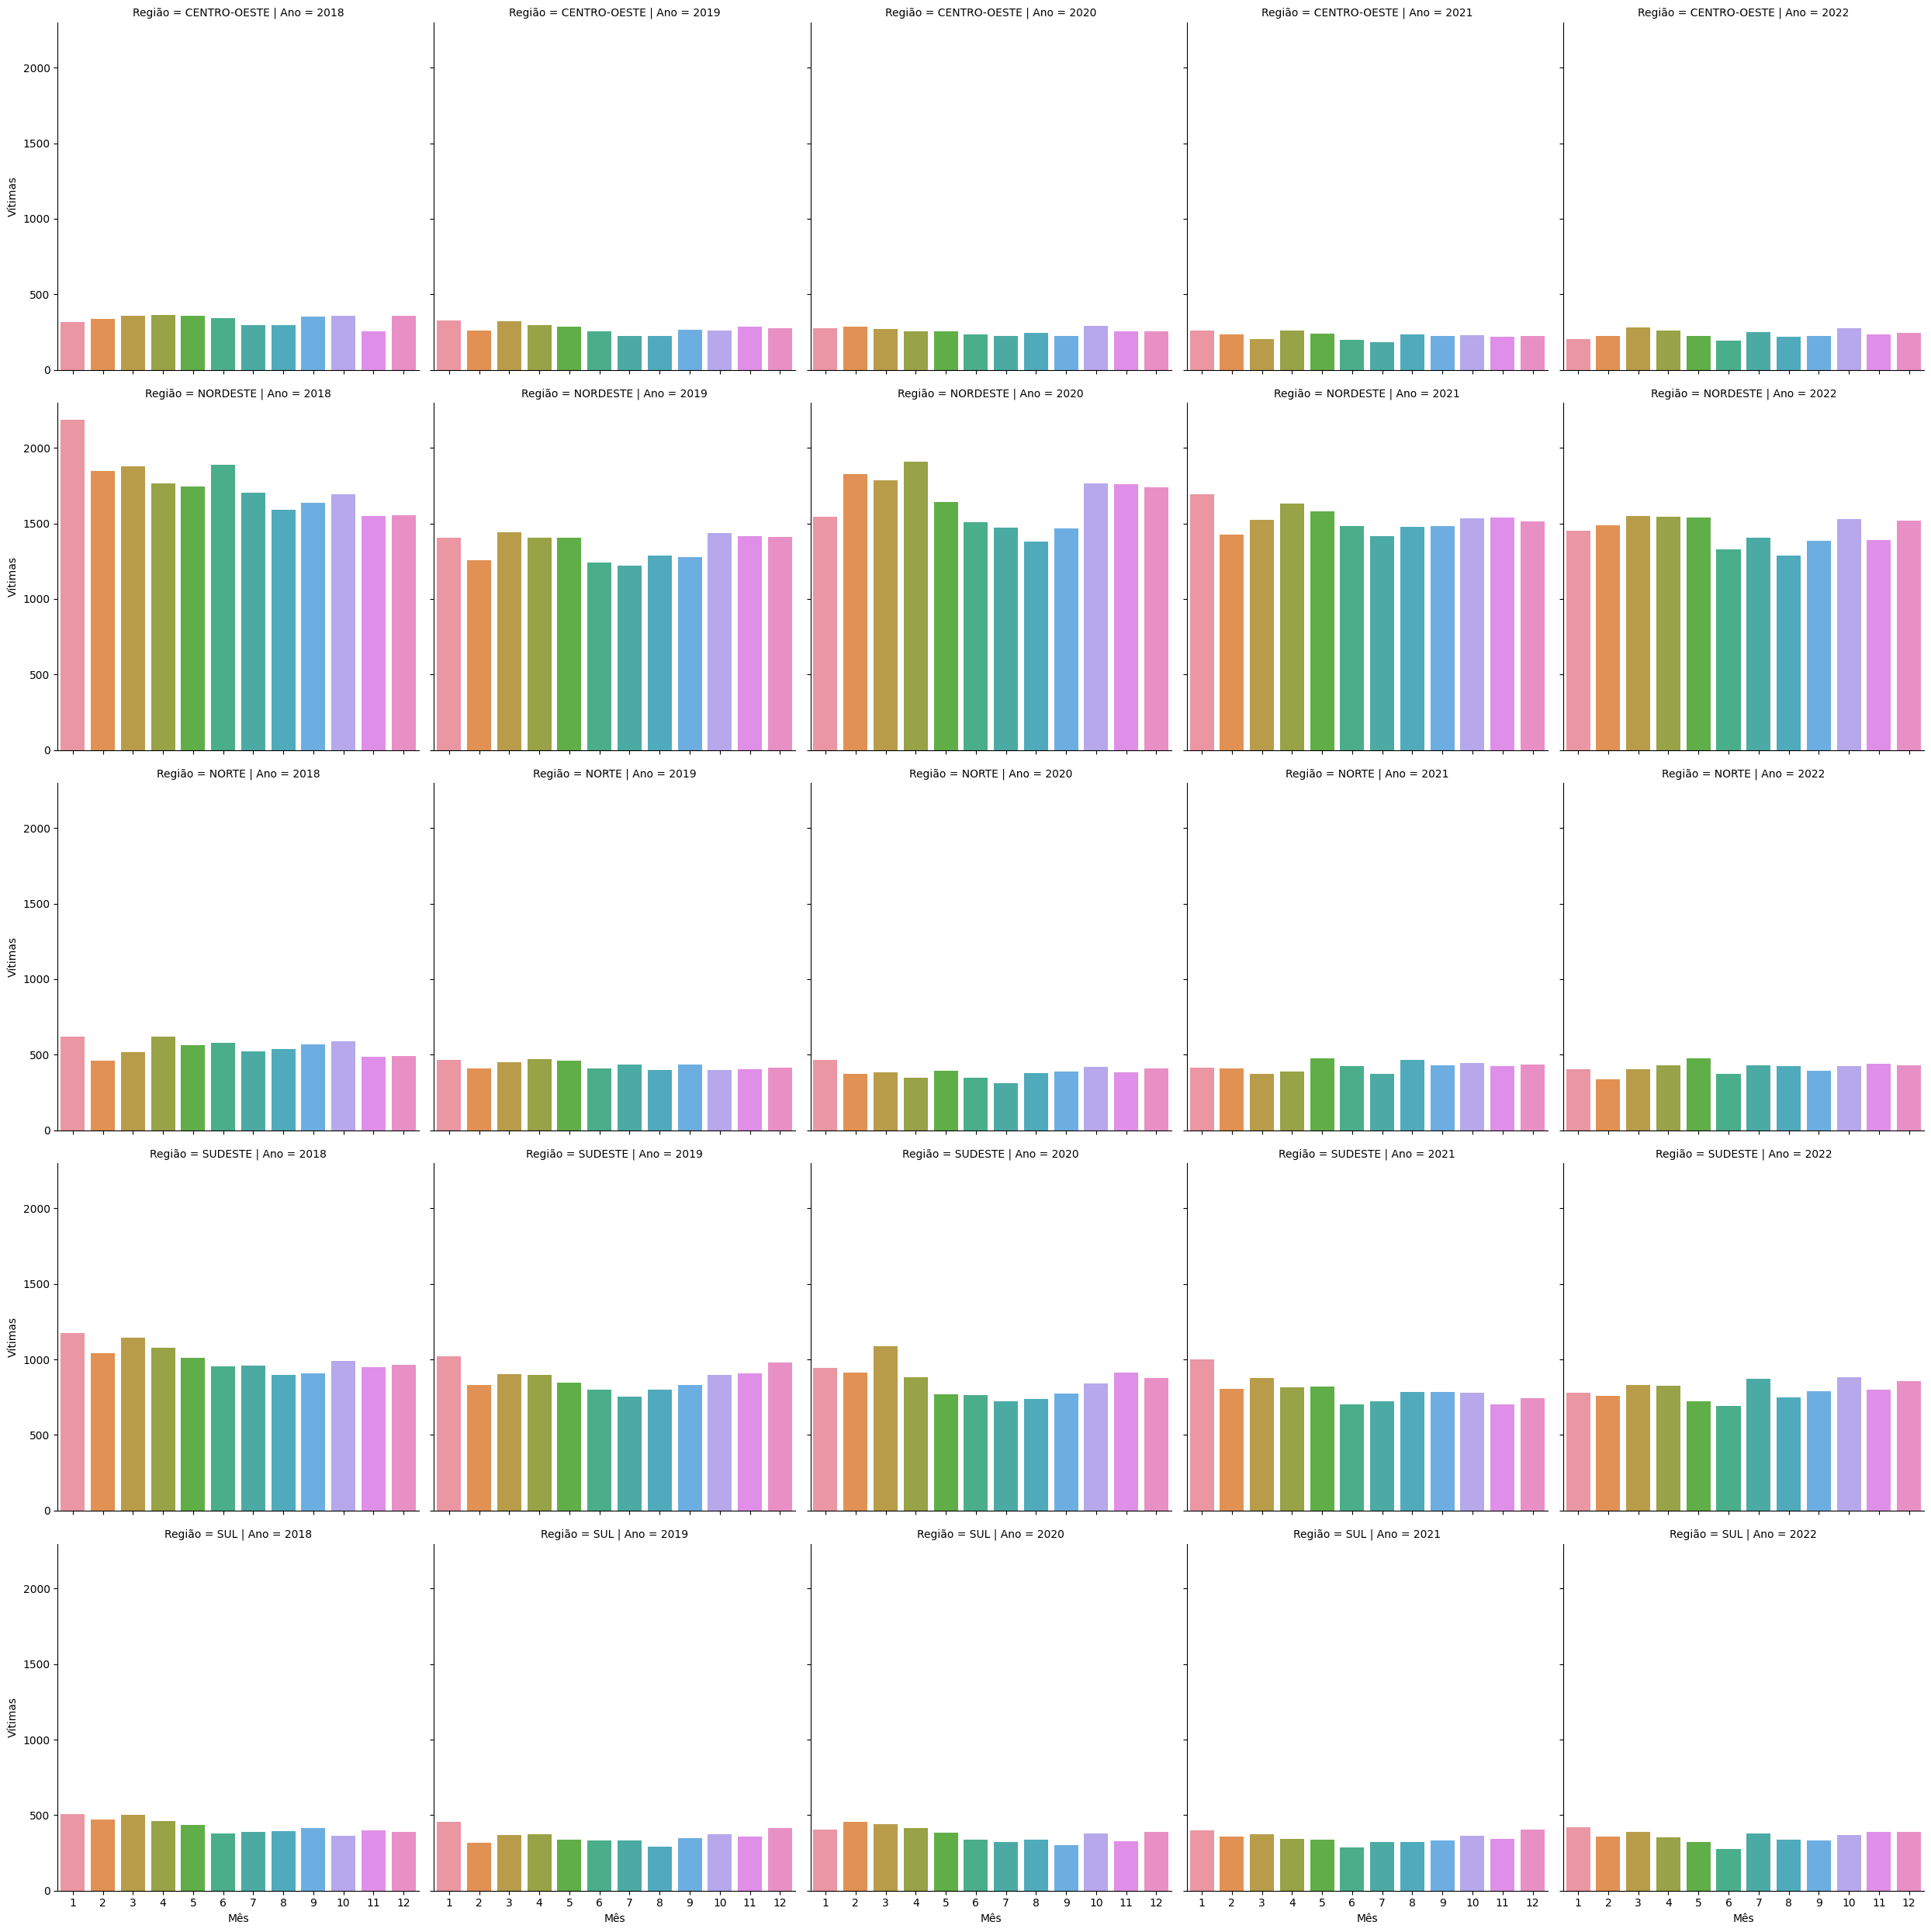

In [34]:
region_df = mun_df_clean.groupby(['Região','Ano','Mês']).sum(numeric_only=True).reset_index()

sns.catplot(
    data=region_df,
    x='Mês',
    y='Vítimas',
    row='Região',
    col='Ano',
    kind='bar',
)